In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def run_nn(n, e, epochs=100, batch_size=21):
    X = np.load(f'Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Generate polynomial features
    degree = e
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    features = X_train_poly.shape[-1]
    print(f"Number of features after polynomial transformation: {features}")

    # Build the neural network model
    model = Sequential([
        Dense(64, input_shape=(features,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_poly, y_train, validation_data=(X_val_poly, y_val),
                        epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_poly, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_accuracy, features


In [9]:
for i in range(5):
    print(run_nn(15,6))

Number of features after polynomial transformation: 54264


/Users/zhangboyan/year4/mathsML/project/ML_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.5013 - loss: 0.8028 - val_accuracy: 0.4890 - val_loss: 0.7002
Epoch 2/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5154 - loss: 0.6983 - val_accuracy: 0.4952 - val_loss: 0.7043
Epoch 3/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5215 - loss: 0.6928 - val_accuracy: 0.4982 - val_loss: 0.7045
Epoch 4/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5451 - loss: 0.6870 - val_accuracy: 0.5113 - val_loss: 0.7119
Epoch 5/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5586 - loss: 0.6797 - val_accuracy: 0.4964 - val_loss: 0.7061
Epoch 6/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5631 - loss: 0.6660 - val_accuracy: 0.5028 - val_loss: 0.7172
Test Accuracy: 0.4983
(0.4983333349227905, 54264)
Number of features after polynomial transformation: 54264


/Users/zhangboyan/year4/mathsML/project/ML_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5069 - loss: 0.8262 - val_accuracy: 0.5067 - val_loss: 0.7134
Epoch 2/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5172 - loss: 0.7028 - val_accuracy: 0.4881 - val_loss: 0.7102
Epoch 3/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5106 - loss: 0.6925 - val_accuracy: 0.5088 - val_loss: 0.7052
Epoch 4/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5344 - loss: 0.6863 - val_accuracy: 0.5066 - val_loss: 0.7035
Epoch 5/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5443 - loss: 0.6761 - val_accuracy: 0.5106 - val_loss: 0.7175
Epoch 6/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5483 - loss: 0.6716 - val_accuracy: 0.5119 - val_loss: 0.7369
Epoch 7/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5869 - loss: 0.6522 - val_accuracy: 0.5049 - val_loss: 0.7381
Epoch 8/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5931 - loss: 0.6378 -

/Users/zhangboyan/year4/mathsML/project/ML_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4890 - loss: 0.8125 - val_accuracy: 0.4980 - val_loss: 0.7248
Epoch 2/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5137 - loss: 0.7078 - val_accuracy: 0.4954 - val_loss: 0.7176
Epoch 3/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5384 - loss: 0.6918 - val_accuracy: 0.5052 - val_loss: 0.7014
Epoch 4/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5408 - loss: 0.6884 - val_accuracy: 0.5080 - val_loss: 0.7155
Epoch 5/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5558 - loss: 0.6816 - val_accuracy: 0.5040 - val_loss: 0.7396
Epoch 6/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5821 - loss: 0.6643 - val_accuracy: 0.4990 - val_loss: 0.7470
Epoch 7/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6043 - loss: 0.6428 - val_accuracy: 0.4997 - val_loss: 0.7493
Epoch 8/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6167 - loss: 0.6214 -

/Users/zhangboyan/year4/mathsML/project/ML_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5097 - loss: 0.7567 - val_accuracy: 0.5029 - val_loss: 0.7198
Epoch 2/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5252 - loss: 0.6960 - val_accuracy: 0.4980 - val_loss: 0.6995
Epoch 3/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5455 - loss: 0.6878 - val_accuracy: 0.4946 - val_loss: 0.6974
Epoch 4/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5634 - loss: 0.6818 - val_accuracy: 0.4976 - val_loss: 0.7150
Epoch 5/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5875 - loss: 0.6652 - val_accuracy: 0.4947 - val_loss: 0.7238
Epoch 6/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6160 - loss: 0.6496 - val_accuracy: 0.4949 - val_loss: 0.7595
Epoch 7/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6378 - loss: 0.6192 - val_accuracy: 0.4899 - val_loss: 0.7702
Epoch 8/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6832 - loss: 0.5797 -

/Users/zhangboyan/year4/mathsML/project/ML_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5031 - loss: 0.7634 - val_accuracy: 0.5087 - val_loss: 0.6979
Epoch 2/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5198 - loss: 0.6952 - val_accuracy: 0.4998 - val_loss: 0.7094
Epoch 3/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5461 - loss: 0.6906 - val_accuracy: 0.4924 - val_loss: 0.7090
Epoch 4/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5676 - loss: 0.6761 - val_accuracy: 0.5046 - val_loss: 0.7208
Epoch 5/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5874 - loss: 0.6695 - val_accuracy: 0.4959 - val_loss: 0.7294
Epoch 6/100
572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6158 - loss: 0.6434 - val_accuracy: 0.5011 - val_loss: 0.7555
Test Accuracy: 0.5008
(0.5007777810096741, 54264)


In [95]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

def run_nn(n, epochs=200, batch_size=32):
    X = np.load(f'Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

    features = X_train.shape[-1]
    print(f"Number of features after polynomial transformation: {features}")

    # Build the neural network model with Dropout and Batch Normalization
    model = Sequential([
        Dense(64, input_shape=(features,), activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        #BatchNormalization(),
        Dense(16, activation='relu'),

        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Plot the training history
    plot_history(history)

    return test_accuracy, features


Number of features after polynomial transformation: 18
Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.5049 - loss: 0.7083 - val_accuracy: 0.5020 - val_loss: 0.6938
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5212 - loss: 0.6910 - val_accuracy: 0.4997 - val_loss: 0.6939
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5275 - loss: 0.6892 - val_accuracy: 0.5162 - val_loss: 0.6959
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5301 - loss: 0.6884 - val_accuracy: 0.5053 - val_loss: 0.6974
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5391 - loss: 0.6861 - val_accuracy: 0.5044 - val_loss: 0.6967
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5360 - loss: 0.6854 - val_accuracy: 0.5053 - val_loss: 0.7052
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5562 - loss: 0.6815 - val_accuracy: 0.5028 - val_loss: 0.7008
Epoch 8/200
450/450 ━━━━━━━━

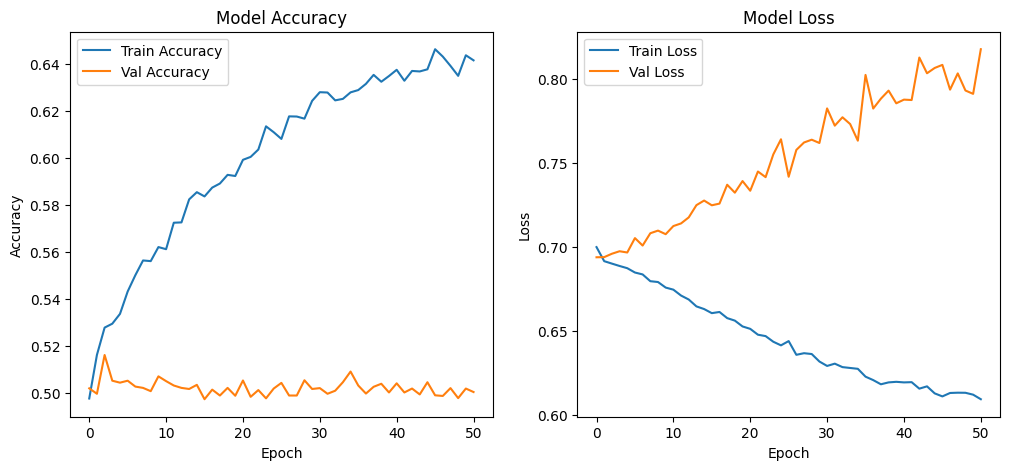

(0.5049999952316284, 18)
Number of features after polynomial transformation: 18
Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.4924 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 0.6935
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5088 - loss: 0.6927 - val_accuracy: 0.5016 - val_loss: 0.6934
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.5195 - loss: 0.6913 - val_accuracy: 0.5063 - val_loss: 0.6940
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5246 - loss: 0.6902 - val_accuracy: 0.4934 - val_loss: 0.6955
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5194 - loss: 0.6908 - val_accuracy: 0.5104 - val_loss: 0.7020
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5337 - loss: 0.6892 - val_accuracy: 0.4979 - val_loss: 0.6979
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5467 - loss: 0.6855 - val_accuracy: 0.5019 - val_loss: 0.6974
Epo

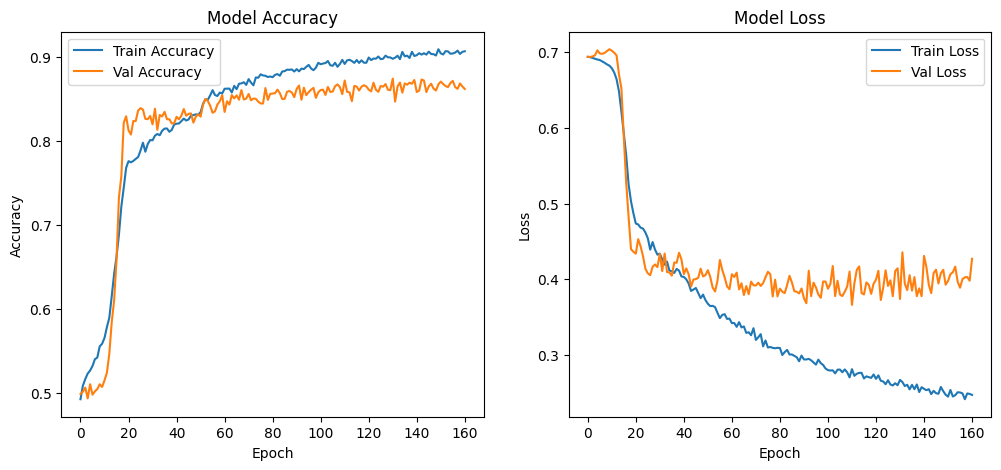

(0.868148148059845, 18)
Number of features after polynomial transformation: 18
Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.4985 - loss: 0.7006 - val_accuracy: 0.5015 - val_loss: 0.6940
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5193 - loss: 0.6911 - val_accuracy: 0.5108 - val_loss: 0.6949
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5315 - loss: 0.6897 - val_accuracy: 0.4946 - val_loss: 0.6979
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5378 - loss: 0.6871 - val_accuracy: 0.5019 - val_loss: 0.6986
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5490 - loss: 0.6865 - val_accuracy: 0.4950 - val_loss: 0.6991
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5408 - loss: 0.6852 - val_accuracy: 0.4924 - val_loss: 0.6999
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.5543 - loss: 0.6832 - val_accuracy: 0.4927 - val_loss: 0.6987
Epoc

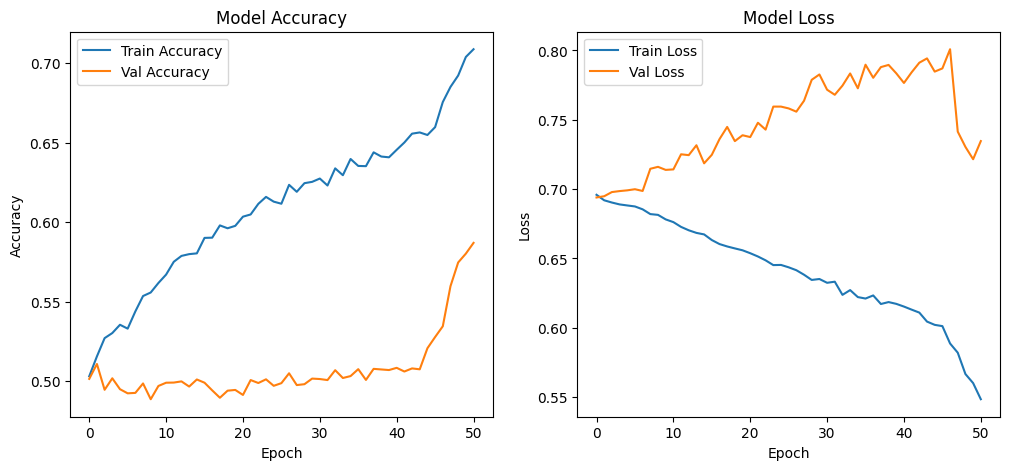

(0.5062037110328674, 18)
Number of features after polynomial transformation: 18
Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.5086 - loss: 0.7029 - val_accuracy: 0.4955 - val_loss: 0.6939
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5221 - loss: 0.6919 - val_accuracy: 0.4944 - val_loss: 0.6955
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5301 - loss: 0.6919 - val_accuracy: 0.5012 - val_loss: 0.6947
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5284 - loss: 0.6906 - val_accuracy: 0.4948 - val_loss: 0.6954
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5358 - loss: 0.6887 - val_accuracy: 0.4954 - val_loss: 0.6959
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5339 - loss: 0.6891 - val_accuracy: 0.5021 - val_loss: 0.6987
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5382 - loss: 0.6879 - val_accuracy: 0.5035 - val_loss: 0.6984
Epo

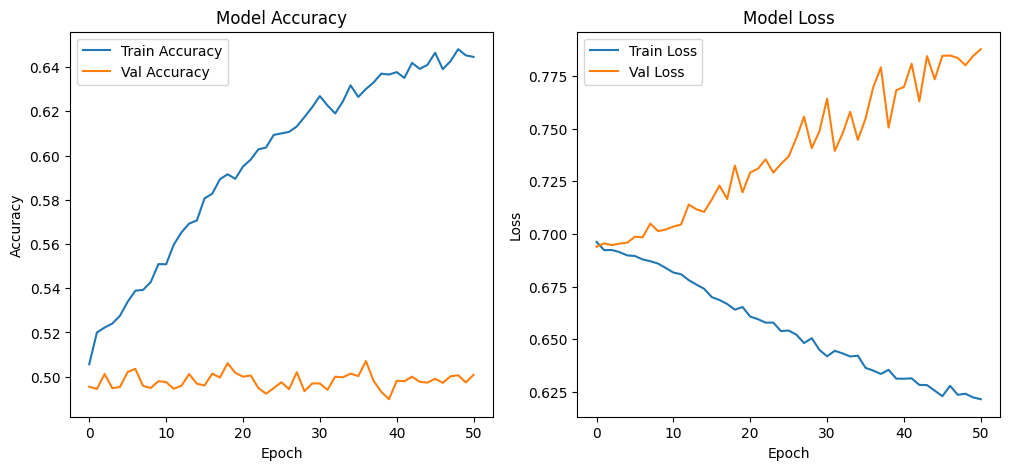

(0.5037037134170532, 18)
Number of features after polynomial transformation: 18
Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.4996 - loss: 0.7073 - val_accuracy: 0.4937 - val_loss: 0.6951
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.5077 - loss: 0.6923 - val_accuracy: 0.5027 - val_loss: 0.6941
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5137 - loss: 0.6911 - val_accuracy: 0.5074 - val_loss: 0.6944
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5120 - loss: 0.6919 - val_accuracy: 0.5108 - val_loss: 0.6951
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5201 - loss: 0.6905 - val_accuracy: 0.4981 - val_loss: 0.6971
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5216 - loss: 0.6895 - val_accuracy: 0.4996 - val_loss: 0.7054
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.5345 - loss: 0.6869 - val_accuracy: 0.5048 - val_loss: 0.6986
Epo

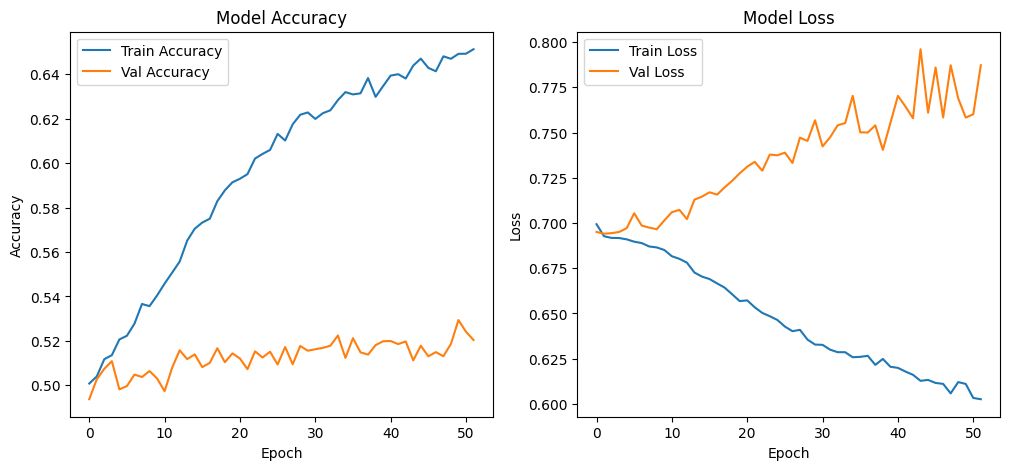

(0.4950000047683716, 18)


In [97]:
for i in range(5):
    print(run_nn(18))